In [10]:
import numpy as np
import scipy
from sparsesvd import sparsesvd

from make_index import build_index, get_vocabulary, build_inverted_index

dir_path = "./txt/"
index, doc_id_to_path = build_index(dir_path)
vocabulary, term_to_id = get_vocabulary(index)
voc_size = vocabulary.shape[0]
inverted_index = build_inverted_index(index, term_to_id)

num_docs = len(index)
del index

def get_tf_matrix(inverted_index):
    tf_matrix = np.zeros((voc_size, num_docs), dtype=np.float32)
    for term, posting_list in enumerate(inverted_index):
        for doc_id, tf in posting_list.iteritems():
            tf_matrix[term, doc_id] = tf
    return tf_matrix

tf_matrix = get_tf_matrix(inverted_index)

In [11]:
def normalize(tf_matrix):
    tf_normalized = tf_matrix / tf_matrix.sum(axis=1).reshape((-1, 1))
    
    tf_normalized = (tf_normalized * np.ma.log(tf_normalized).filled(0.) / np.log(num_docs)).sum(axis=1).reshape((-1, 1))
    tf_normalized = tf_normalized * np.log(tf_matrix + 1.)
    return tf_normalized

tf_matrix = normalize(tf_matrix)

In [12]:
tf_matrix = scipy.sparse.csc_matrix(tf_matrix)

Не нашёл библиотеки, которая позволяла бы делать разложение на 1000 сингулярных чисел. Есть имплементации с параметром full_matrices, но для них не хватает оперативной памяти. Поэтому делаю разложение на размер наименьшей оси (кол-во документов).

In [14]:
%%time
Ut, S, Vt = sparsesvd(tf_matrix, 1000) 

Wall time: 2.46 s


In [35]:
diff_norms = np.cumsum((S**2)[::-1])[::-1]
diff_norms -= diff_norms[-1]

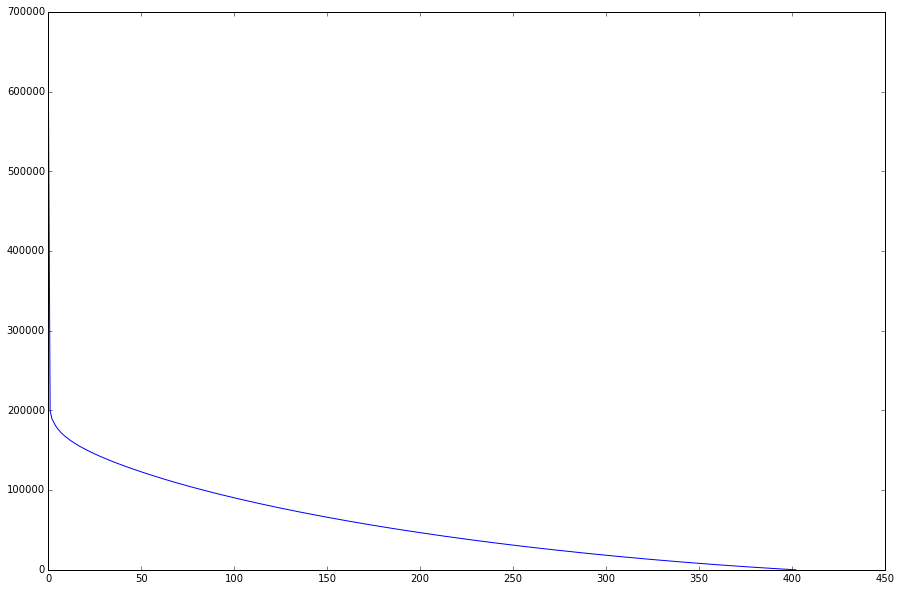

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(diff_norms);

Выберем r=403, т.е. на конце графика наиб.